In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
pd.excelFraudSheet = pd.read_excel(r"C:\Users\Nirmoh\PycharmProjects\Harshita_FraudDetection\CC-3Y-Transactions.xlsx")

In [5]:
pd.excelFraudSheet.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574


In [6]:
pd.excelFraudSheet['Year']= pd.excelFraudSheet['Date'].dt.year
df =pd.excelFraudSheet
print(df)

                        City       Date  Card Type Exp Type Gender  Amount  \
0               Delhi, India 2014-10-29       Gold    Bills      F   82475   
1      Greater Mumbai, India 2014-08-22   Platinum    Bills      F   32555   
2           Bengaluru, India 2014-08-27     Silver    Bills      F  101738   
3      Greater Mumbai, India 2014-04-12  Signature    Bills      F  123424   
4           Bengaluru, India 2015-05-05       Gold    Bills      F  171574   
...                      ...        ...        ...      ...    ...     ...   
26047         Kolkata, India 2014-06-22     Silver   Travel      F  128191   
26048            Pune, India 2014-08-03  Signature   Travel      M  246316   
26049       Hyderabad, India 2015-01-16     Silver   Travel      M  265019   
26050          Kanpur, India 2014-09-14     Silver   Travel      M   88174   
26051       Hyderabad, India 2013-10-19  Signature    Bills      M  184410   

       Year  
0      2014  
1      2014  
2      2014  
3      

In [7]:
excelFraudSheet_2013 = df[df.Year==2013]
sum_df_2013 = excelFraudSheet_2013.groupby(['Year','City']).agg({'Amount': 'sum'}).nlargest(5,'Amount').sort_values('City', ascending=False).transpose()
print(sum_df_2013)

Year            2013                                                      \
City   Kanpur, India Greater Mumbai, India Delhi, India Bengaluru, India   
Amount      19640338              84735652     82126961         84999287   

Year                     
City   Ahmedabad, India  
Amount         83291837  


In [8]:
excelFraudSheet_2014 = df[df.Year==2014]
sum_df_2014 = excelFraudSheet_2014.groupby(['Year','City']).agg({'Amount': 'sum'}).nlargest(5,'Amount').sort_values('City', ascending=False).transpose()
print(sum_df_2014)

Year               2014                                                      \
City   Hyderabad, India Greater Mumbai, India Delhi, India Bengaluru, India   
Amount         71066005             349709415    329591186        351482095   

Year                     
City   Ahmedabad, India  
Amount        348289187  


In [9]:
excelFraudSheet_2015 = df[df.Year==2015]
sum_df_2015 = excelFraudSheet_2015.groupby(['Year','City']).agg({'Amount': 'sum'}).nlargest(5,'Amount').sort_values('City', ascending=False).transpose()
print(sum_df_2015)

Year             2015                                                      \
City   Kolkata, India Greater Mumbai, India Delhi, India Bengaluru, India   
Amount       30918731             142306409    145211065        135845357   

Year                     
City   Ahmedabad, India  
Amount        136213286  


In [10]:
sum_df = df.groupby(['Year','City']).agg({'Amount': 'sum'}).nlargest(5,'Amount').sort_values(['Year','City'], ascending=False)
print(sum_df)

                               Amount
Year City                            
2015 Delhi, India           145211065
2014 Greater Mumbai, India  349709415
     Delhi, India           329591186
     Bengaluru, India       351482095
     Ahmedabad, India       348289187


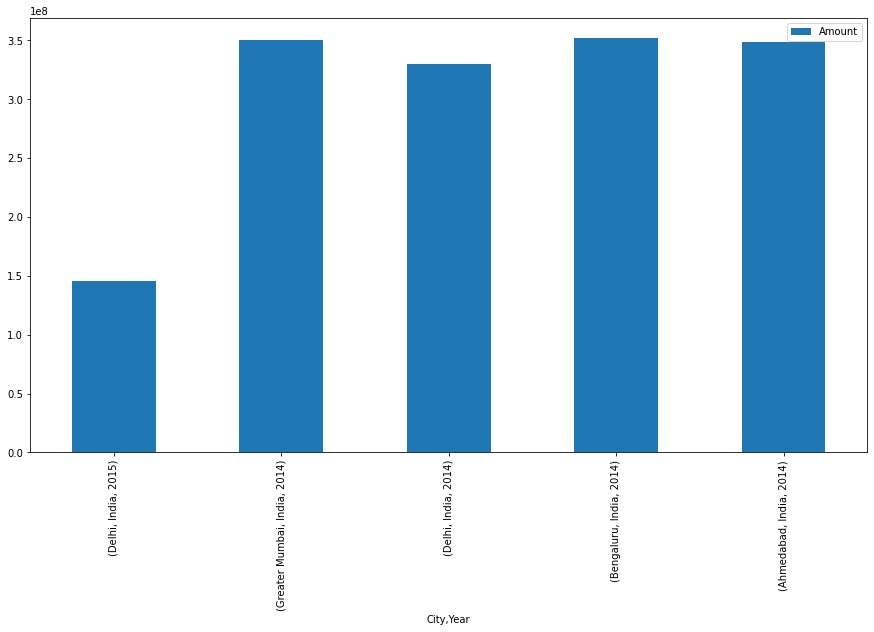

In [11]:
pivot = pd.pivot_table(df,index=['City', 'Year'], values=['Amount'], aggfunc='sum').nlargest(5,'Amount').sort_values(['Year','City'], ascending=False).plot(kind='bar',figsize=(15,8))
plt.legend(loc='upper right')
plt.show()

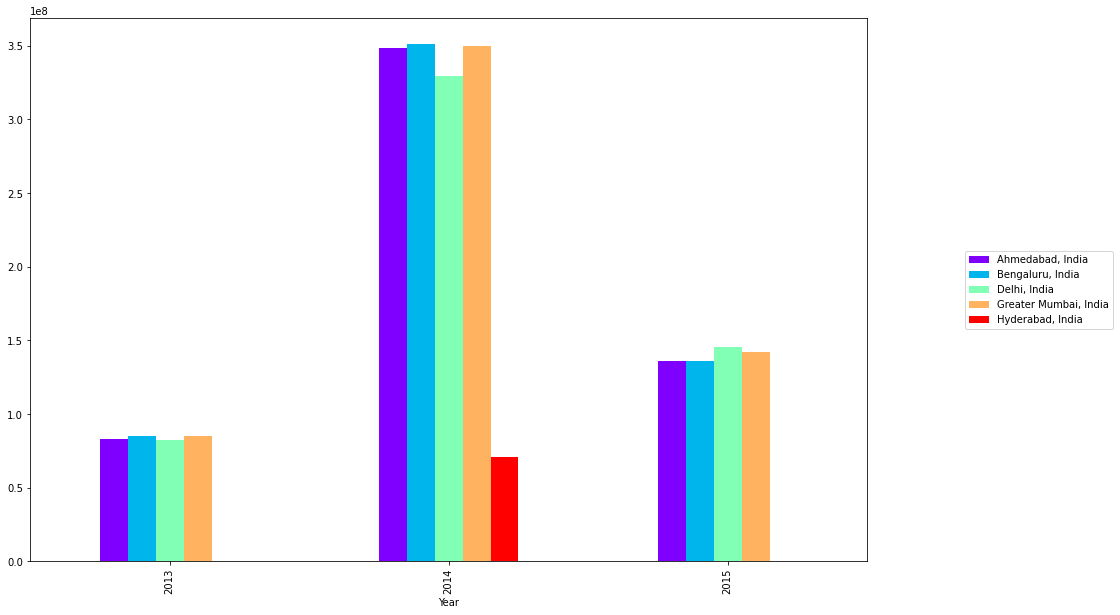

In [12]:
pivot = pd.pivot_table(df.groupby(['Year','City']).agg({'Amount': 'sum'}).nlargest(13,'Amount'), index='Year', columns='City', values='Amount', aggfunc='sum').plot(kind='bar',figsize=(15,10), colormap='rainbow', linewidth=2)
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
plt.show()

In [13]:
pd.excelFraudSheet['Quarter'] = pd.excelFraudSheet['Date'].dt.quarter
df =pd.excelFraudSheet
print(df)

                        City       Date  Card Type Exp Type Gender  Amount  \
0               Delhi, India 2014-10-29       Gold    Bills      F   82475   
1      Greater Mumbai, India 2014-08-22   Platinum    Bills      F   32555   
2           Bengaluru, India 2014-08-27     Silver    Bills      F  101738   
3      Greater Mumbai, India 2014-04-12  Signature    Bills      F  123424   
4           Bengaluru, India 2015-05-05       Gold    Bills      F  171574   
...                      ...        ...        ...      ...    ...     ...   
26047         Kolkata, India 2014-06-22     Silver   Travel      F  128191   
26048            Pune, India 2014-08-03  Signature   Travel      M  246316   
26049       Hyderabad, India 2015-01-16     Silver   Travel      M  265019   
26050          Kanpur, India 2014-09-14     Silver   Travel      M   88174   
26051       Hyderabad, India 2013-10-19  Signature    Bills      M  184410   

       Year  Quarter  
0      2014        4  
1      2014      

In [14]:
df['Quarter'] = df['Quarter'].apply(lambda x: f"Quarter {x}")
print(df)

                        City       Date  Card Type Exp Type Gender  Amount  \
0               Delhi, India 2014-10-29       Gold    Bills      F   82475   
1      Greater Mumbai, India 2014-08-22   Platinum    Bills      F   32555   
2           Bengaluru, India 2014-08-27     Silver    Bills      F  101738   
3      Greater Mumbai, India 2014-04-12  Signature    Bills      F  123424   
4           Bengaluru, India 2015-05-05       Gold    Bills      F  171574   
...                      ...        ...        ...      ...    ...     ...   
26047         Kolkata, India 2014-06-22     Silver   Travel      F  128191   
26048            Pune, India 2014-08-03  Signature   Travel      M  246316   
26049       Hyderabad, India 2015-01-16     Silver   Travel      M  265019   
26050          Kanpur, India 2014-09-14     Silver   Travel      M   88174   
26051       Hyderabad, India 2013-10-19  Signature    Bills      M  184410   

       Year    Quarter  
0      2014  Quarter 4  
1      2014  

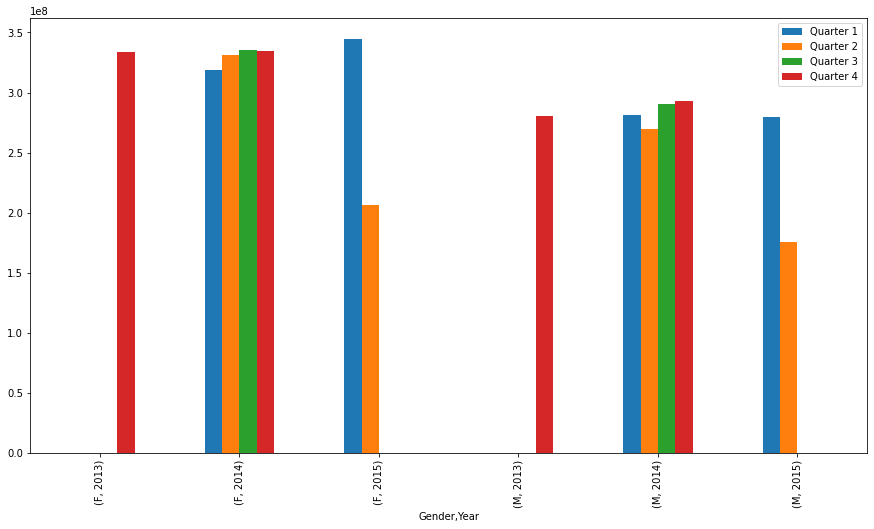

In [15]:
table = pd.pivot_table(df, values='Amount', index=['Gender', 'Year'], columns='Quarter', aggfunc=np.sum).plot(kind='bar',figsize=(15,8))
table
plt.legend(loc='upper right')
plt.show()

In [16]:
table_2013 = pd.pivot_table(df, values='Amount', index=['Gender', 'Year'], columns='Quarter', aggfunc=np.sum)
table_2013

Quarter        Quarter 1    Quarter 2    Quarter 3    Quarter 4
Gender Year                                                    
F      2013          NaN          NaN          NaN  333421908.0
       2014  318768288.0  331421060.0  335382914.0  334689993.0
       2015  344993188.0  206633679.0          NaN          NaN
M      2013          NaN          NaN          NaN  280221976.0
       2014  281336181.0  269947023.0  290613061.0  292555513.0
       2015  279678969.0  175169620.0          NaN          NaN

In [17]:
excelFraudSheet_Qtr_2013 = df[df.Year==2013]
table_2013 = pd.pivot_table(excelFraudSheet_Qtr_2013, values='Amount', index=['Gender', 'Year'], columns='Quarter', aggfunc=np.sum)
table_2013

,Quarter,Quarter 4
Gender,Year,
F,2013,333421908
M,2013,280221976


In [18]:
excelFraudSheet_Qtr_2014 = df[df.Year==2014]
table_2014 = pd.pivot_table(excelFraudSheet_Qtr_2014, values='Amount', index=['Gender', 'Year'], columns='Quarter', aggfunc=np.sum)
table_2014

,Quarter,Quarter 1,Quarter 2,Quarter 3,Quarter 4
Gender,Year,,,,
F,2014,318768288,331421060,335382914,334689993
M,2014,281336181,269947023,290613061,292555513


In [19]:
excelFraudSheet_Qtr_2015 = df[df.Year==2015]
table_2015 = pd.pivot_table(excelFraudSheet_Qtr_2015, values='Amount', index=['Gender', 'Year'], columns='Quarter', aggfunc=np.sum)
table_2015

,Quarter,Quarter 1,Quarter 2
Gender,Year,,
F,2015,344993188,206633679
M,2015,279678969,175169620


In [27]:
excelFraudSheet_ExpType_2013 = df[df.Year==2013]
sum_ExpType_2013 = excelFraudSheet_ExpType_2013.groupby(['Year','Exp Type']).agg({'Amount': 'sum'}).nlargest(3,'Amount').sort_values('Exp Type', ascending=True).transpose()
print(sum_ExpType_2013)

Year           2013                      
Exp Type      Bills       Food       Fuel
Amount    136165014  123284967  113938738


In [28]:
excelFraudSheet_ExpType_2014 = df[df.Year==2014]
sum_ExpType_2014 = excelFraudSheet_ExpType_2014.groupby(['Year','Exp Type']).agg({'Amount': 'sum'}).nlargest(3,'Amount').sort_values('Exp Type', ascending=True).transpose()
print(sum_ExpType_2014)

Year           2014                      
Exp Type      Bills       Food       Fuel
Amount    543741413  491383057  481697184


In [29]:
excelFraudSheet_ExpType_2015 = df[df.Year==2015]
sum_ExpType_2015 = excelFraudSheet_ExpType_2015.groupby(['Year','Exp Type']).agg({'Amount': 'sum'}).nlargest(3,'Amount').sort_values('Exp Type', ascending=True).transpose()
print(sum_ExpType_2015)

Year           2015                      
Exp Type      Bills       Food       Fuel
Amount    227166046  210055985  193499899


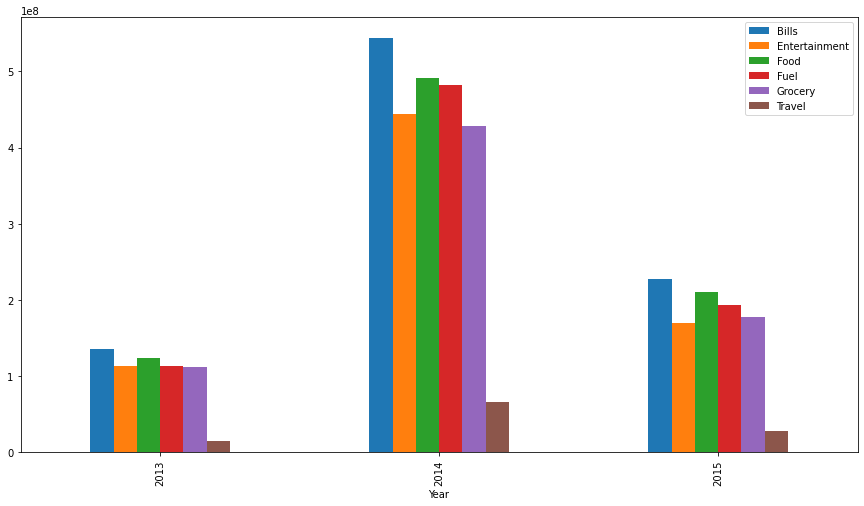

In [30]:
table = pd.pivot_table(df, values='Amount', index= 'Year', columns='Exp Type', aggfunc=np.sum).plot(kind='bar',figsize=(15,8))
table
plt.legend(loc='upper right')
plt.show()